In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
df = pd.read_csv('Absenteeism_at_work.csv', delimiter=';')

In [10]:
df.head(20)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [11]:
df_new = df.copy()

In [12]:
# Let's quickly go through the rows as well as the columns of the dataset
# The view is limited, where only top 5 and bottom 5 are shown (the middle is deprecated)
# To fix this, we can set our max view to 'None' to both rows and columns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Viewing the dataset once more

df_new

# Reset the view
pd.options.display.max_rows = 10
pd.options.display.max_columns = None

In [13]:
# Data Types

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [14]:
df_new = df_new.drop(['ID'], axis = 1)
df_new

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


In [15]:

print(df_new['Reason for absence'].max()) # The maximum number for this column is 28
print(df_new['Reason for absence'].median()) # The middle mumber for this column is 23 (this can be applied as this column is integer types)
print(df_new['Reason for absence'].min()) # The minimum number for this column is 0

print(len(pd.unique(df_new['Reason for absence'])))


28
23.0
0
28


In [16]:
print(pd.unique(df_new['Reason for absence']))

# Sort them from lowest to highest

df_absence = df_new.sort_values(['Reason for absence'])
print(pd.unique(df_absence['Reason for absence']))

[26  0 23  7 22 19  1 11 14 21 10 13 28 18 25 24  6 27 17  8 12  5  9 15
  4  3  2 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28]


In [17]:
arr = np.array(df_new['Reason for absence'].unique())

# Sort them from lowest to highest

print(np.sort(arr))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28]


In [18]:
reason_dummy = pd.get_dummies(df_new['Reason for absence'])

print(reason_dummy)


        0      1      2      3      4      5      6      7      8      9   \
0    False  False  False  False  False  False  False  False  False  False   
1     True  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False   True  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
735  False  False  False  False  False  False  False  False  False  False   
736  False  False  False  False  False  False  False  False  False  False   
737   True  False  False  False  False  False  False  False  False  False   
738   True  False  False  False  False  False  False  False  False  False   
739   True  False  False  False  False  False  False  False  False  False   

        10     11     12     13     14     15     16     17     18     19  

In [19]:
# To check that 1 is populated and non is missing

sum = reason_dummy.sum(axis = 1)
print(sum)

# All of the indexes have been occupied by 1s

check_1 = sum.unique()
print(check_1)

# Here, we can already verify 1 has been occupied

0      1
1      1
2      1
3      1
4      1
      ..
735    1
736    1
737    1
738    1
739    1
Length: 740, dtype: int64
[1]


In [20]:
reason_dummy = pd.get_dummies(df_new['Reason for absence'], drop_first = True)

# Re-check whether the column '0' has been dropped

print(reason_dummy)

        1      2      3      4      5      6      7      8      9      10  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False   True  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
735  False  False  False  False  False  False  False  False  False  False   
736  False  False  False  False  False  False  False  False  False  False   
737  False  False  False  False  False  False  False  False  False  False   
738  False  False  False  False  False  False  False  False  False  False   
739  False  False  False  False  False  False  False  False  False  False   

        11     12     13     14     15     16     17     18     19     21  

In [21]:
# The next step now is to replace the df_new datframe containing 'Reasons for absence' column with the encodded ones above

print(df_new.columns.values)

# We need to 'merge' the reason_dummy with the df_new dataframe
# But, instead of dropping, we will replace with a new dataset but with much larger size (column 1 - column 28)
# In this situation, we can group the variables and re-organize our data
# We know that, in principle, we have 4 types of reasons for absence (common sickness, complications from pregnancy, poisoning related and light reasons
#  1- 14: represents common sickness
# 15 - 17: complications that could result from pregnancy
# 18 - 21: Related to poisoning
# 22 - 28: Consultation, follow ups, (light reasons for absence) etc

# We need to 'split' reason_dummy into 4 columns corresponding to only 4 types of absence
# And within these reasons, any of the rows must have 1 as the reason for absence

reason_type_1 = reason_dummy.loc[:,1:14].max(axis =1)
reason_type_2 = reason_dummy.loc[:,15:17].max(axis =1)
reason_type_3 = reason_dummy.loc[:,18:21].max(axis =1)
reason_type_4 = reason_dummy.loc[:,22:28].max(axis =1)

# Do note that applying max will return these variables or attributes as Pandas Series instead of Pandas DataFrame

['Reason for absence' 'Month of absence' 'Day of the week' 'Seasons'
 'Transportation expense' 'Distance from Residence to Work' 'Service time'
 'Age' 'Work load Average/day ' 'Hit target' 'Disciplinary failure'
 'Education' 'Son' 'Social drinker' 'Social smoker' 'Pet' 'Weight'
 'Height' 'Body mass index' 'Absenteeism time in hours']


In [22]:
# Dropping the Reasons for absence original column in df_new

df_new = df_new.drop(['Reason for absence'], axis = 1)

In [23]:
# Use concat to concatenate pandas series (reason_types) along a particular axis

df_new = pd.concat([df_new, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)

In [24]:
# Next, we need to rename these columns

print(df_new.columns.values)

df_new.columns = ['Month of absence' ,'Day of the week' ,'Seasons' ,'Transportation expense'
 ,'Distance from Residence to Work' ,'Service time' ,'Age'
 ,'Work load Average/day ' ,'Hit target' ,'Disciplinary failure' ,'Education'
 ,'Son' ,'Social drinker' ,'Social smoker' ,'Pet' ,'Weight' ,'Height'
 ,'Body mass index' ,'Absenteeism time in hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

['Month of absence' 'Day of the week' 'Seasons' 'Transportation expense'
 'Distance from Residence to Work' 'Service time' 'Age'
 'Work load Average/day ' 'Hit target' 'Disciplinary failure' 'Education'
 'Son' 'Social drinker' 'Social smoker' 'Pet' 'Weight' 'Height'
 'Body mass index' 'Absenteeism time in hours' 0 1 2 3]


In [25]:
# Re-order the columns to make the Reasons to appear on the left of dataframe
df_new = df_new[['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4'
 ,'Month of absence' ,'Day of the week' ,'Seasons' ,'Transportation expense'
 ,'Distance from Residence to Work' ,'Service time' ,'Age'
 ,'Work load Average/day ' ,'Hit target' ,'Disciplinary failure' ,'Education'
 ,'Son' ,'Social drinker' ,'Social smoker' ,'Pet' ,'Weight' ,'Height'
 ,'Body mass index' ,'Absenteeism time in hours']]

In [26]:
df_new.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,False,False,False,True,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,False,False,False,False,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,False,False,False,True,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,True,False,False,False,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,False,False,False,True,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [27]:
df_new_reason = df_new.copy()

In [28]:
# let's take deeper look at the columns related to date..

month = df_new_reason['Month of absence']
day = df_new_reason['Day of the week']
seasons = df_new_reason['Seasons']

month_arr = np.array(df_new_reason['Month of absence'].unique())
print(np.sort(month_arr))

day_arr =np.array(df_new_reason['Day of the week'].unique())
print(np.sort(day_arr))

seasons_arr =np.array(df_new_reason['Seasons'].unique())
print(np.sort(seasons_arr))

# the arrays below shows that these values appear to be ordinal and categorical data type
# the next question is, how useful these features will be for our analyses

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[2 3 4 5 6]
[1 2 3 4]


C:\Users\user hp\AppData\Local\Temp\ipykernel_16276\209480121.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


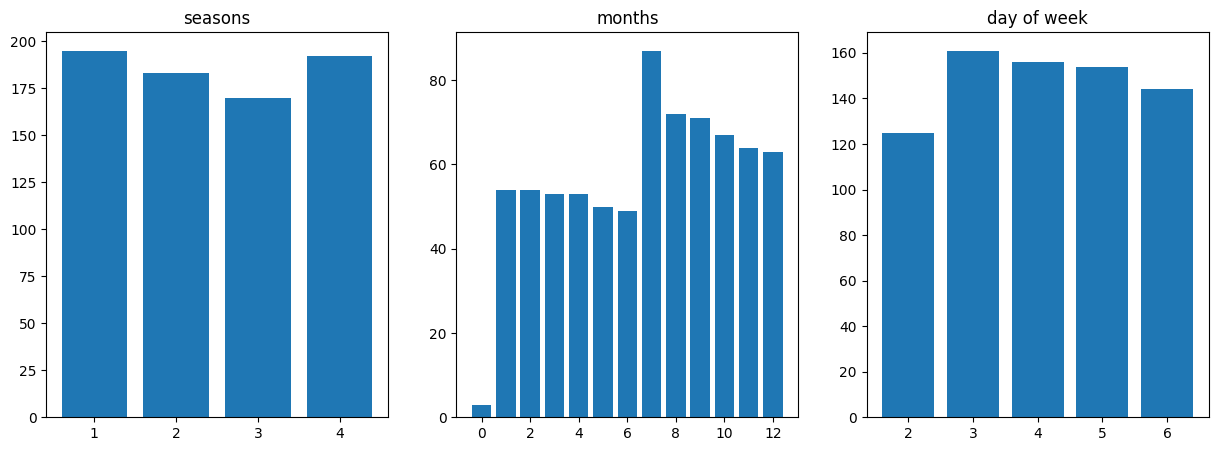

In [29]:
# let's find out how are these values for each of these columns are distributed in the dataset 
# plotting a simply bar chart for these categorical types of data

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5))

# seasons
ax1.bar(seasons_arr, seasons.value_counts())
ax1.set_title('seasons')

# month
ax2.bar(month_arr, month.value_counts())
ax2.set_title('months')

# dayofweek
ax3.bar(day_arr, day.value_counts())
ax3.set_title('day of week')

fig.show()

# observing the counts of the occurrance shows a very unique distribution
# The attributes related to seasons indicate a balanced distribution throughout the dataset.
# As for months, it is observed that the highest peak is July. Surprisingly, 0 are also included here as well
# As for day of the week, Tuesday (3) records the highest count, followed by Monday (2) which has the lowest count among all weekdays

# for now, let's keep this attribute as it is as it might be worth exploring later

In [30]:
df_new_reason.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype=object)

In [31]:
### Transportation Expenses, Distance to Work, Service time, Age, Work load Average/day, Height, Weight,  Body Mass Index, Service Time

# Most of the columns listed here will not be manipulated since it already convey the actual meaning in their real terms
# Let's take a look about their data types and how can we explain each of these terms

# Transporation Expenses
# They are costs related to business travel
# In this case, they are measured in dollars ($) and assumed to have been rounded up or rounded down
# Hence why the data type is in integer format
print(type(df_new_reason['Transportation expense'][0]))

# Distance from Residence to Work
# The distance that the employee must travel to work
# They are represented in kilometers and again, assumed to have been rounded up or rounded down
# Hence why the data type is in integer format
print(type(df_new_reason['Distance from Residence to Work'][0]))

# Age
# The age of the employee in years
# Same as before...
print(type(df_new_reason['Age'][0]))

# Service time
# They represents has the employee been serving the company
print(type(df_new_reason['Service time']))

# Work load Average/day
# The average amount of time spent working per day
# They are represented in minutes
# Unlike the above, it is a float type
print(type(df_new_reason['Work load Average/day '][0]))

# Body Mass Index or BMI
# Logically, people who weigh above the norm for their height often have an additional reason for being absent from work
# That's why we should keep these numbers for analyses
print(type(df_new_reason['Body mass index'][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
<class 'numpy.int64'>


In [32]:
# Height and Weight
# This feature has been explained by the other feature, BMI
# Therefore, we we won't be needing this feature as it will become redundant in our analyses
df_new_reason = df_new_reason.drop(['Height'], axis = 1)
df_new_reason = df_new_reason.drop(['Weight'], axis = 1)

In [33]:
df_var_ex = df_new_reason.copy()

In [34]:
# Education represents a categorical data type where those numeric number does not have numeric meaning
# In fact, based on the given information, there are only 1s, 2s, 3s and 4s

df_var_ex['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [35]:
# Based on the domain knowledge, it is told that 1 = high school education, 2 = graduate education, 3 = postgraduate & 4 = master or doctor
# Let's count the distribution of these labels

df_var_ex['Education'].value_counts()

# Basically, we have <600 compromises those who only finishes high school and top 100 to those with higher education background

Education
1    611
3     79
2     46
4      4
Name: count, dtype: int64

In [36]:
# Here we have a choice, either 
# 1. we map the Education into 4 classes and create even more dummy variables
# OR
# 2. we only map them into 2 classes (those with only high school qualification and those with higher education)
# For the sake of simplicity, we will choose option 2.

# In this case, we need to map education label 1s to 0 while the rest to 1

df_var_ex['Education'] = df_var_ex['Education'].map({1:0, 2:1, 3:1, 4:1})

df_var_ex['Education'].unique()

array([0, 1], dtype=int64)

In [37]:
df_preprocessed = df_var_ex.copy()

In [38]:
df_preprocessed.to_csv('Absenteeism_preprocessed.csv', index = False)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data_p = pd.read_csv('Absenteeism_preprocessed.csv')

In [41]:
data_p.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,False,False,False,True,7,3,1,289,36,13,33,239.554,97,0,0,2,1,0,1,30,4
1,False,False,False,False,7,3,1,118,13,18,50,239.554,97,1,0,1,1,0,0,31,0
2,False,False,False,True,7,4,1,179,51,18,38,239.554,97,0,0,0,1,0,0,31,2
3,True,False,False,False,7,5,1,279,5,14,39,239.554,97,0,0,2,1,1,0,24,4
4,False,False,False,True,7,5,1,289,36,13,33,239.554,97,0,0,2,1,0,1,30,2


Text(0, 0.5, 'Count')

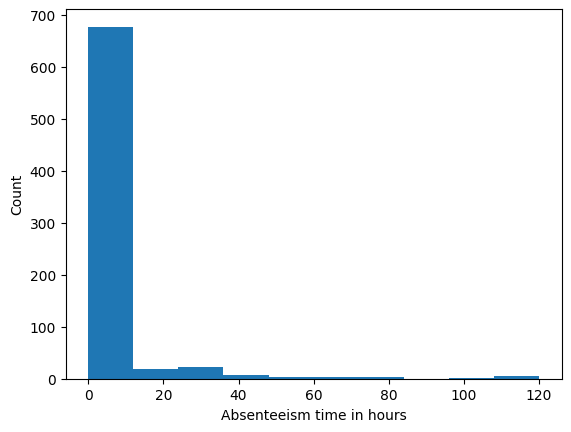

In [42]:

plt.hist(data_p['Absenteeism time in hours'])
plt.xlabel('Absenteeism time in hours')
plt.ylabel('Count')
           

In [43]:

print(data_p['Absenteeism time in hours'].mean())
print(data_p['Absenteeism time in hours'].median())
print(data_p['Absenteeism time in hours'].min())
print(data_p['Absenteeism time in hours'].max())

6.924324324324324
3.0
0
120


In [44]:
data_p['Absenteeism time in hours'].describe(include='all')

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64

In [45]:
median = data_p['Absenteeism time in hours'].median()

In [46]:
# Assigning the numbers using np.where

targets = np.where(data_p['Absenteeism time in hours'] > median, 1, 0)

data_p['Absenteeism time in hours'] = targets

In [47]:
targets.sum() / targets.shape[0]

0.4581081081081081

In [48]:

data_with_targets = data_p.copy()
data_with_targets.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,False,False,False,True,7,3,1,289,36,13,33,239.554,97,0,0,2,1,0,1,30,1
1,False,False,False,False,7,3,1,118,13,18,50,239.554,97,1,0,1,1,0,0,31,0
2,False,False,False,True,7,4,1,179,51,18,38,239.554,97,0,0,0,1,0,0,31,0
3,True,False,False,False,7,5,1,279,5,14,39,239.554,97,0,0,2,1,1,0,24,1
4,False,False,False,True,7,5,1,289,36,13,33,239.554,97,0,0,2,1,0,1,30,0


In [49]:
# Renaming the target column

data_with_targets['Excessive Absenteeism'] = data_with_targets['Absenteeism time in hours']

In [50]:
# Dropping the initial column
# data_with_targets = data_with_targets.drop(['Absenteeism time in hours'], axis = 1)

## On the 2nd iteration, we will drop the columns that we have identified when interpreting the coefficients
data_with_targets = data_with_targets.drop(['Absenteeism time in hours', 'Work load Average/day ', 'Education', 'Age', 'Hit target', 'Reason_2'], axis = 1)

In [51]:
# Using iloc to only select all of the other features besides the target and assign them as inputs

data_with_inputs_unscaled = data_with_targets.iloc[:,:-1]

In [52]:
# Re-checking the inputs

data_with_inputs_unscaled

,Reason_1,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Body mass index
0,False,False,True,7,3,1,289,36,13,0,2,1,0,1,30
1,False,False,False,7,3,1,118,13,18,1,1,1,0,0,31
2,False,False,True,7,4,1,179,51,18,0,0,1,0,0,31
3,True,False,False,7,5,1,279,5,14,0,2,1,1,0,24
4,False,False,True,7,5,1,289,36,13,0,2,1,0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,True,False,False,7,3,1,289,36,13,0,2,1,0,1,30
736,True,False,False,7,3,1,235,11,14,0,1,0,0,1,29
737,False,False,False,0,3,1,118,14,13,0,1,1,0,8,34
738,False,False,False,0,4,2,231,35,14,0,2,1,0,2,35


In [53]:
# Split the dataset target into only containing the targets

data_with_targets = data_with_targets['Excessive Absenteeism']

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
abs_scaler = StandardScaler()

In [56]:
# Fit the inputs (and calculate the mean and std. dev. feature wise)

# abs_scaler.fit(data_with_inputs_unscaled)

# Transform the inputs

# data_with_inputs_scaled = abs_scaler.transform(data_with_inputs_unscaled)


## 2nd iteration: Normally we will scale all of the features here but since we ran into an issues to interpret the odds for dummy variables, we will momentarily disable this feature and instead we will the custom code or custom class below:
## Import the libraries needed for the custom scaler:

from sklearn.base import BaseEstimator, TransformerMixin

# Create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler()
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [57]:

data_with_inputs_unscaled.columns.values

array(['Reason_1', 'Reason_3', 'Reason_4', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time',
       'Disciplinary failure', 'Son', 'Social drinker', 'Social smoker',
       'Pet', 'Body mass index'], dtype=object)

In [58]:
# Choose the columns to scale and augment this code (copy above)
# Retain the columns we want for scale and omit those with dummy variables (Reasons and Education)

## On the 2nd iteration, we will use comprehension list in order to sort our columns to scale seamlessly
## Therefore, we will reserve the code below and instead only declare columns_to_omit

#columns_to_scale = ['Month of absence',
       #'Day of the week', 'Seasons', 'Transportation expense',
       #'Distance from Residence to Work', 'Service time', 'Son',
       #'Pet', 'Body mass index']
    
# select the columns to omit
columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Education', 'Social drinker', 'Social smoker', 'Disciplinary failure']

# Create the columns to scale, based on the columns to omit
# Use list comprehension to iterate over the list
columns_to_scale = [x for x in data_with_inputs_unscaled.columns.values if x not in columns_to_omit]

In [59]:
# Declare a scaler object, specifying the columns you want to scale
abs_scaler = CustomScaler(columns_to_scale)

In [60]:
# Fit the inputs (and calculate the mean and std. dev. feature wise)
abs_scaler.fit(data_with_inputs_unscaled)

c:\Users\user hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


CustomScaler(columns=['Month of absence', 'Day of the week', 'Seasons',
                      'Transportation expense',
                      'Distance from Residence to Work', 'Service time', 'Son',
                      'Pet', 'Body mass index'])

In [61]:
# Transform the data
data_with_inputs_scaled = abs_scaler.transform(data_with_inputs_unscaled)

In [62]:
# Re-check the inputs

print(data_with_inputs_scaled)

# shape

print('\n',data_with_inputs_scaled.shape)

     Reason_1  Reason_3  Reason_4  Month of absence  Day of the week  \
0       False     False      True          0.196763        -0.643947   
1       False     False     False          0.196763        -0.643947   
2       False     False      True          0.196763         0.059924   
3        True     False     False          0.196763         0.763796   
4       False     False      True          0.196763         0.763796   
..        ...       ...       ...               ...              ...   
735      True     False     False          0.196763        -0.643947   
736      True     False     False          0.196763        -0.643947   
737     False     False     False         -1.841698        -0.643947   
738     False     False     False         -1.841698         0.059924   
739     False     False     False         -1.841698         1.467667   

      Seasons  Transportation expense  Distance from Residence to Work  \
0   -1.390175                1.011408                        

In [63]:
# Import the relevant package
from sklearn.model_selection import train_test_split

In [64]:
# Split the dataset to overcome overfitting, with 20-80 split with shuffling enabled
# We will stick to random_state

x_train, x_test, y_train, y_test = train_test_split(data_with_inputs_scaled, data_with_targets, train_size = 0.8, random_state = 20, shuffle = True)

In [65]:
# Shpae of the training dataset

print(x_train.shape)
print(y_train.shape)

(592, 15)
(592,)


In [66]:
# Shpae of the testing dataset

print(x_test.shape)
print(y_test.shape)

(148, 15)
(148,)


In [67]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [68]:
# Logistic Regression

log_reg = LogisticRegression()

In [69]:
# Fit the scaled inputs and targets

log_reg.fit(x_train, y_train)

LogisticRegression()

In [70]:
# Predict the outputs using scaled inputs

log_reg.predict(x_train)

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [71]:

print(log_reg.score(x_train, y_train))

# Manually compare the arrays of predicted outputs with the targets
print(np.sum(log_reg.predict(x_train) == y_train)/y_train.shape[0])

0.7668918918918919
0.7668918918918919


In [72]:
# We are now interested to use this model outside of Python
# Logistic Regression model is about determining whats is the intercept and the coefficients

# Intercept
print('intercept:', log_reg.intercept_)

# Coefficients
print('coefficient:', log_reg.coef_)

# Each of these coefficients represents the column or the values from the inputs that we obtain
# Let's refer each of these coefficients to the columns

# Do note that if we access the variable inputs after scaled, we will only get arrays
# That is because sklearn will process any inputs and transform them into arrays
print('\n',data_with_inputs_scaled)

# The alternative to this is to access the unscaled data instead since it is still in dataframe format
print('\n','weights:', data_with_inputs_unscaled.columns.values)

intercept: [-0.79092114]
coefficient: [[ 1.60209285  1.74828468 -0.31993027  0.24658591 -0.16989704 -0.31514493
   0.51281174 -0.11275256 -0.2946991  -2.80337781  0.42351438  0.70726008
   0.42240234 -0.3244328   0.24069226]]

      Reason_1  Reason_3  Reason_4  Month of absence  Day of the week  \
0       False     False      True          0.196763        -0.643947   
1       False     False     False          0.196763        -0.643947   
2       False     False      True          0.196763         0.059924   
3        True     False     False          0.196763         0.763796   
4       False     False      True          0.196763         0.763796   
..        ...       ...       ...               ...              ...   
735      True     False     False          0.196763        -0.643947   
736      True     False     False          0.196763        -0.643947   
737     False     False     False         -1.841698        -0.643947   
738     False     False     False         -1.841698 

In [73]:
# Now let's create a summary table

reg_summary = pd.DataFrame(data_with_inputs_unscaled.columns.values, columns = ['Features'])
reg_summary['Coefficients'] = np.transpose(log_reg.coef_)

reg_summary

,Features,Coefficients
0,Reason_1,1.602093
1,Reason_3,1.748285
2,Reason_4,-0.319930
3,Month of absence,0.246586
4,Day of the week,-0.169897
...,...,...
10,Son,0.423514
11,Social drinker,0.707260
12,Social smoker,0.422402
13,Pet,-0.324433


In [74]:
# Let's insert the Intercept at index = 0

intercept = pd.DataFrame({'Features':'Intercept', 'Coefficients':log_reg.intercept_[0]}, index = [0])

reg_summary = pd.concat([intercept, reg_summary.loc[:]]).reset_index(drop=True)

In [75]:
reg_summary

,Features,Coefficients
0,Intercept,-0.790921
1,Reason_1,1.602093
2,Reason_3,1.748285
3,Reason_4,-0.319930
4,Month of absence,0.246586
...,...,...
11,Son,0.423514
12,Social drinker,0.707260
13,Social smoker,0.422402
14,Pet,-0.324433


In [76]:
reg_summary['Odds Ratio'] = np.exp(reg_summary['Coefficients'])

In [77]:
# Print the summary table that contains the exponent odds

reg_summary

# Let's sort them in accordance to its increasing Odds Ratio

reg_summary.sort_values('Odds Ratio', ascending = False)

,Features,Coefficients,Odds Ratio
2,Reason_3,1.748285,5.744740
1,Reason_1,1.602093,4.963409
12,Social drinker,0.707260,2.028426
7,Transportation expense,0.512812,1.669980
11,Son,0.423514,1.527320
...,...,...,...
6,Seasons,-0.315145,0.729683
3,Reason_4,-0.319930,0.726200
14,Pet,-0.324433,0.722937
0,Intercept,-0.790921,0.453427


In [78]:
print(log_reg.score(x_test, y_test))

0.7702702702702703


In [79]:

predicted_proba = log_reg.predict_proba(x_test)
print(predicted_proba)

[[0.55196495 0.44803505]
 [0.09735907 0.90264093]
 [0.91332677 0.08667323]
 [0.80668807 0.19331193]
 [0.58925877 0.41074123]
 [0.59868927 0.40131073]
 [0.54232942 0.45767058]
 [0.5133758  0.4866242 ]
 [0.82193031 0.17806969]
 [0.86238795 0.13761205]
 [0.19645498 0.80354502]
 [0.84757169 0.15242831]
 [0.80050571 0.19949429]
 [0.76719762 0.23280238]
 [0.46656519 0.53343481]
 [0.36258341 0.63741659]
 [0.67847664 0.32152336]
 [0.15272194 0.84727806]
 [0.84478171 0.15521829]
 [0.46477702 0.53522298]
 [0.80050571 0.19949429]
 [0.78787107 0.21212893]
 [0.65185297 0.34814703]
 [0.82756969 0.17243031]
 [0.23590854 0.76409146]
 [0.52350944 0.47649056]
 [0.13106416 0.86893584]
 [0.60014236 0.39985764]
 [0.57177433 0.42822567]
 [0.43504954 0.56495046]
 [0.83428117 0.16571883]
 [0.3647795  0.6352205 ]
 [0.08416776 0.91583224]
 [0.04489917 0.95510083]
 [0.21698672 0.78301328]
 [0.89502393 0.10497607]
 [0.55018706 0.44981294]
 [0.55751047 0.44248953]
 [0.79072958 0.20927042]
 [0.07639543 0.92360457]


In [80]:
import pickle

In [81]:
with open('model', 'wb') as file:
    pickle.dump(log_reg, file)

In [82]:
with open('scaler', 'wb') as file:
    pickle.dump(abs_scaler, file)

In [83]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [84]:
# Storing the codes from the previous exercise into a module will help users to reuse our model without any trouble
# There will be multiple classes listed in the code below, where each of them will contain a function that will create new instances
# Each of these functions (or methods) will have to be fed with specific arguments, otherwise it would not work
# There are 5 distinct functions (or methods) in this module: 
    # 1. __init__ method (a constructor; when we run this code, it will instaneously initializes the attributes of the class)
    # 2. load_and_clean_data
    # 3. predicted_probability
    # 4. predicted_output_category
    # 5. predicted_outputs

import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin


class CustomScaler(BaseEstimator,TransformerMixin): 
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.array(np.mean(X[self.columns]))
        self.var_ = np.array(np.var(X[self.columns]))
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]



class absenteeism_model():
      
        def __init__(self, model_file, scaler_file): # in the previous exercise where we create model and scaler file, we need to 'unpickle' them here
            # read the 'model' and 'scaler' files which were saved
            with open('model','rb') as model_file, open('scaler', 'rb') as scaler_file:
                self.reg = pickle.load(model_file)
                self.scaler = pickle.load(scaler_file)
                self.data = None

        # take a data file (*.csv) and preprocess it in the same way as before
        def load_and_clean_data(self, data_file):
            
            # import the data
            df = pd.read_csv(data_file,delimiter=';')
            # store the data in a new variable
            self.df_with_predictions = df.copy()
            # drop the 'ID' column
            df = df.drop(['ID'], axis = 1)
            # to preserve the code we've created in the previous section, we will add a column with 'NaN' strings
            df['Absenteeism time in hours'] = 'NaN'

            # create a separate dataframe, containing dummy values for ALL avaiable reasons
            reason_columns = pd.get_dummies(df['Reason for absence'], drop_first = True)
            
            # split reason_columns into 4 types
            reason_type_1 = reason_columns.loc[:,1:14].max(axis=1)
            reason_type_2 = reason_columns.loc[:,15:17].max(axis=1)
            reason_type_3 = reason_columns.loc[:,18:21].max(axis=1)
            reason_type_4 = reason_columns.loc[:,22:].max(axis=1)
            
            # to avoid multicollinearity, drop the 'Reason for Absence' column from df
            df = df.drop(['Reason for absence'], axis = 1)
            
            # concatenate df and the 4 types of reason for absence
            df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)
            
            # assign names to the 4 reason type columns          
            column_names = df_new.columns = ['Month of absence' ,'Day of the week' ,'Seasons' ,'Transportation expense'
                                             ,'Distance from Residence to Work' ,'Service time' ,'Age'
                                                ,'Work load Average/day ' ,'Hit target' ,'Disciplinary failure' ,'Education'
                                                 ,'Son' ,'Social drinker' ,'Social smoker' ,'Pet' ,'Weight' ,'Height'
                                                 ,'Body mass index' ,'Absenteeism time in hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']
            df.columns = column_names

            # re-order the columns in df
            column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month of absence' ,'Day of the week' ,'Seasons' ,'Transportation expense'
                                             ,'Distance from Residence to Work' ,'Service time' ,'Age'
                                                ,'Work load Average/day ' ,'Hit target' ,'Disciplinary failure' ,'Education'
                                                 ,'Son' ,'Social drinker' ,'Social smoker' ,'Pet' ,'Weight' ,'Height'
                                                 ,'Body mass index' ,'Absenteeism time in hours']
            
            df = df[column_names_reordered]

            # map 'Education' variables; the result is a dummy
            df['Education'] = df['Education'].map({1:0, 2:1, 3:1, 4:1})

            # replace the NaN values
            df = df.fillna(value=0)

            # drop the original absenteeism time
            df = df.drop(['Absenteeism time in hours'],axis=1)
            
            # drop the variables we decide we don't need
            df = df.drop(['Work load Average/day ', 'Age', 'Education', 'Hit target', 'Reason_2', 'Weight', 'Height'],axis=1)
            
            # we have included this line of code if you want to call the 'preprocessed data'
            self.preprocessed_data = df.copy()
            
            # we need this line so we can use it in the next functions
            self.data = self.scaler.transform(df)
            
            return self.data
    
        # a function which outputs the probability of a data point to be 1
        def predicted_probability(self):
            if (self.data is not None):
                return self.data
                pred = self.reg.predict_proba(self.data)[:,1]
                return pred
        
        # a function which outputs 0 or 1 based on our model
        def predicted_output_category(self):
            if (self.data is not None):
                pred_outputs = self.reg.predict(self.data)
                return pred_outputs
        
        # predict the outputs and the probabilities and 
        # add columns with these values at the end of the new data
        def predicted_outputs(self):
            if (self.data is not None):
                self.preprocessed_data['Probability'] = self.reg.predict_proba(self.data)[:,1]
                self.preprocessed_data ['Prediction'] = self.reg.predict(self.data)
                return self.preprocessed_data

In [85]:

model = absenteeism_model('model','scaler')

In [86]:
# Import relevant modules for preprocessing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [87]:
model.load_and_clean_data('Absenteeism_at_work.csv')

,Reason_1,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Body mass index
0,False,False,True,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,0,0.893723,1,0,0.192850,0.775932
1,False,False,False,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,1,-0.017234,1,0,-0.566240,1.009438
2,False,False,True,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0,-0.928191,1,0,-0.566240,1.009438
3,True,False,False,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0,0.893723,1,1,-0.566240,-0.625100
4,False,False,True,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,0,0.893723,1,0,0.192850,0.775932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,True,False,False,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,0,0.893723,1,0,0.192850,0.775932
736,True,False,False,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0,-0.017234,0,0,0.192850,0.542427
737,False,False,False,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0,-0.017234,1,0,5.506478,1.709954
738,False,False,False,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0,0.893723,1,0,0.951940,1.943459


In [88]:
model.predicted_probability()

,Reason_1,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Body mass index
0,False,False,True,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,0,0.893723,1,0,0.192850,0.775932
1,False,False,False,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,1,-0.017234,1,0,-0.566240,1.009438
2,False,False,True,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0,-0.928191,1,0,-0.566240,1.009438
3,True,False,False,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0,0.893723,1,1,-0.566240,-0.625100
4,False,False,True,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,0,0.893723,1,0,0.192850,0.775932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,True,False,False,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,0,0.893723,1,0,0.192850,0.775932
736,True,False,False,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0,-0.017234,0,0,0.192850,0.542427
737,False,False,False,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0,-0.017234,1,0,5.506478,1.709954
738,False,False,False,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0,0.893723,1,0,0.951940,1.943459
